#Task-4: Build a Student Performance Prediction Model 🎓📊

🎯 Objective:
Develop a machine learning model to predict students' academic performance (e.g., final grades) based on various features such as attendance, study habits, and socio-economic factors.

Submitted by: Akshat Thakur

#Step 1: Dataset Generation

This code will generate a synthetic dataset for the model with random values for attendance, study habits, socio-economic factors, and final grades:

In [6]:
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Number of students (samples)
num_students = 1000

# Generate synthetic data
attendance = np.random.randint(50, 100, num_students)  # Attendance percentage
study_habits = np.random.randint(1, 11, num_students)  # Study habits (1-10 scale)
socio_economic = np.random.randint(1, 6, num_students)  # Socio-economic status (1-5 scale)

# Final grade influenced by attendance, study habits, and socio-economic factors
final_grade = (0.5 * attendance + 0.3 * study_habits + 0.2 * socio_economic + np.random.normal(0, 5, num_students)).clip(0, 100)

# Create the dataset as a DataFrame
student_data = pd.DataFrame({
    'Attendance': attendance,
    'Study_Habits': study_habits,
    'Socio_Economic_Factors': socio_economic,
    'Final_Grade': final_grade
})

# Preview head and tail of the dataset
print("Head of the dataset:")
print(student_data.head())

print("\nTail of the dataset:")
print(student_data.tail())

# Save to CSV for use
student_data.to_csv('student_performance_data.csv', index=False)


Head of the dataset:
   Attendance  Study_Habits  Socio_Economic_Factors  Final_Grade
0          88             9                       1    47.807934
1          78             1                       4    48.645806
2          64             5                       3    28.497887
3          92             6                       1    47.450311
4          57             5                       4    25.866805

Tail of the dataset:
     Attendance  Study_Habits  Socio_Economic_Factors  Final_Grade
995          75             2                       4    45.736364
996          83             1                       5    42.319863
997          94            10                       3    44.238526
998          55             8                       4    30.141988
999          86             8                       1    41.744913


#Linear Regression Model:

Linear Regression is a simple and widely-used machine learning algorithm that assumes a linear relationship between the input features and the target variable. It tries to find the best-fitting straight line (hyperplane in higher dimensions) to predict the target values based on the features.

Linear Regression MSE: 26.775469514738443


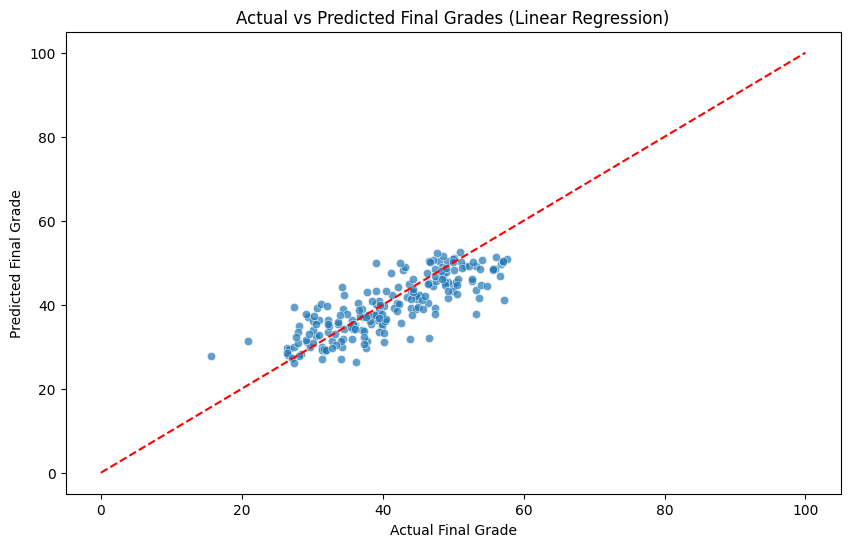

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
student_data = pd.read_csv('student_performance_data.csv')

# Define features and target
X = student_data[['Attendance', 'Study_Habits', 'Socio_Economic_Factors']]
y = student_data['Final_Grade']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
y_pred_linear = linear_model.predict(X_test)

# Evaluate the model
mse_linear = mean_squared_error(y_test, y_pred_linear)
print(f"Linear Regression MSE: {mse_linear}")

# Visualize: Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_linear, alpha=0.7)
plt.plot([0, 100], [0, 100], color='red', linestyle='--')
plt.title('Actual vs Predicted Final Grades (Linear Regression)')
plt.xlabel('Actual Final Grade')
plt.ylabel('Predicted Final Grade')
plt.show()


#Decision Tree Regressor:

A Decision Tree Regressor is a non-linear model that recursively splits the dataset based on feature values. It creates a tree where each node represents a decision based on a feature, and the leaves correspond to predicted target values. It's useful for capturing complex patterns in the data.

Decision Tree MSE: 49.37082770913266


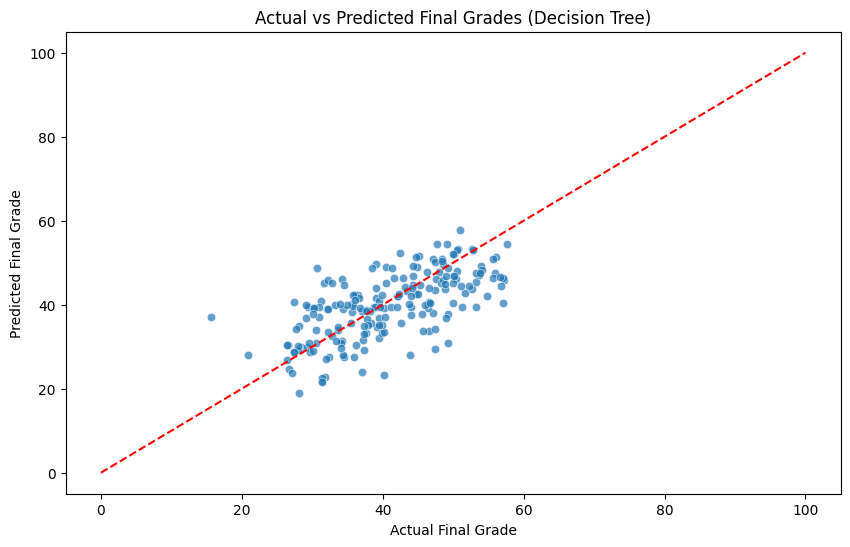

In [4]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Train Decision Tree model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Make predictions
y_pred_tree = tree_model.predict(X_test)

# Evaluate the model
mse_tree = mean_squared_error(y_test, y_pred_tree)
print(f"Decision Tree MSE: {mse_tree}")

# Visualize: Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_tree, alpha=0.7)
plt.plot([0, 100], [0, 100], color='red', linestyle='--')
plt.title('Actual vs Predicted Final Grades (Decision Tree)')
plt.xlabel('Actual Final Grade')
plt.ylabel('Predicted Final Grade')
plt.show()


#Random Forest Regressor:

A Random Forest Regressor is an ensemble learning method that creates multiple decision trees and combines their predictions. By averaging the results of many trees, Random Forest reduces overfitting and improves accuracy over a single decision tree.

Random Forest MSE: 31.64286245563453


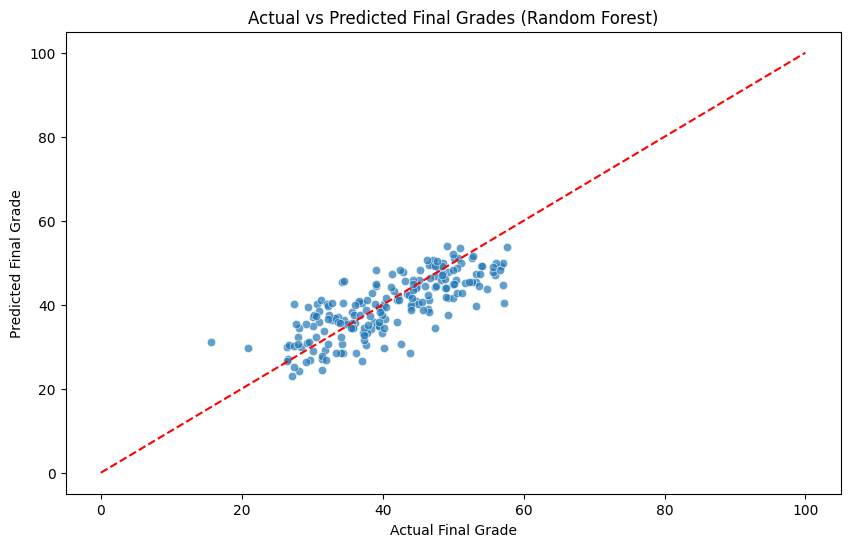

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Train Random Forest model
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)

# Make predictions
y_pred_forest = forest_model.predict(X_test)

# Evaluate the model
mse_forest = mean_squared_error(y_test, y_pred_forest)
print(f"Random Forest MSE: {mse_forest}")

# Visualize: Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_forest, alpha=0.7)
plt.plot([0, 100], [0, 100], color='red', linestyle='--')
plt.title('Actual vs Predicted Final Grades (Random Forest)')
plt.xlabel('Actual Final Grade')
plt.ylabel('Predicted Final Grade')
plt.show()
